In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import seaborn as sb
import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa
import cmath
import matplotlib.pyplot as plt


In [3]:
import torch

In [4]:

def bitwise_input(input,n_max = 16):  
    bits = []
    for i in bin(input)[2:]:
        bits.append((int(i)*1.1)-0.1)
    # filling
    for _ in range(n_max - len(bits)):
        bits.append(0)
    return bits[:n_max]

print(bitwise_input(25112313))

[1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, -0.1, 1.0, -0.1, 1.0, 1.0, 1.0]


In [125]:
qbits = 16
depth = 1

dev = qml.device("default.qubit", wires=qbits,shots = 3)

@qml.qnode(dev)
def qnode(inputs,weights):
    #print(weights)
    weights = weights.reshape(depth,qbits)
    qml.AngleEmbedding(bitwise_input(inputs,qbits),wires = range(qbits))
    #qml.BasicEntanglerLayers(weights, wires=range(qbits))
    for i in range(depth):
        #qml.Snapshot()
        # Parameterised layer
        for y in range(qbits):
            qml.RY(weights[i][y], wires=y)

        # Control Z gates
        for y in range(qbits - 1):
            qml.CZ(wires=[y, y + 1])
    #qml.Snapshot()
    output = []
    
    #for i in range(qbits):   
        #output.append(qml.expval(qml.PauliZ(i)))
    return qml.probs(wires=list(range(qbits)))
#qml.sample(qml.PauliY(0))
# [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)] 
# qml.probs(wires=list(range(qbits)))

weight_shapes = {"weights": (depth, qbits)}
qlayer = qml.qnn.TorchLayer(qnode,weight_shapes)
model = torch.nn.Sequential(*[qlayer])
    

In [126]:
opt = torch.optim.SGD(model.parameters(), lr=0.2)

In [127]:
#!pip install seaborn freetype


In [133]:
testrange = 20
#out = []
#for i in range(testrange):
inp = torch.tensor(12502)
#out.append(model(inp).numpy().tolist())
out = model(inp)#.numpy().tolist()

In [134]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

0.weights tensor([[2.6224, 5.8419, 2.8505, 6.2311, 0.4953, 4.7231, 4.2800, 0.5844, 0.7740,
         5.9051, 3.0504, 4.2041, 1.1894, 5.7935, 2.1985, 5.3043]])


In [135]:
print(out)
#read = qml.snapshots(qlayer)(torch.tensor(25234))[0].numpy().real

tensor([0, 0, 0,  ..., 0, 0, 0])


<Axes: >

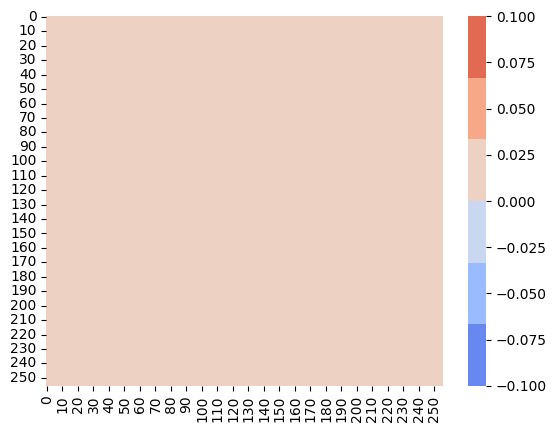

In [136]:
sb.heatmap(out.reshape(256,256),cmap= sb.color_palette("coolwarm"))

In [137]:
for i in range(len(out[0])):
    print(np.mean(out[:][i]))

TypeError: len() of a 0-d tensor